<a href="https://colab.research.google.com/github/roderikmogot/dog-breed-classifier/blob/main/modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dog Breed Classifier**

## Problem
Untuk menentukan jenis anjing.

## Data
Data diambil dari: https://www.kaggle.com/c/dog-breed-identification

## Features
Beberapa hal yang harus diperhatikan:
* Menggunakan MobileNetV2 sebagai arsitektur model.
* Dapat mengklasifikasi 120 jenis anjing.
* Training dataset ada sekitar ~10000 gambar.
* Setiap jenis anjing memiliki rata-rata 82 gambar.

## Import data

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/dog-breed-identification.zip"

## Import library

In [ ]:
import tensorflow as tf
print("TF version", tf.__version__)

TF version 2.7.0


In [ ]:
import tensorflow_hub as hub
print("TF Hub version:", hub.__version__)

TF Hub version: 0.12.0


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import os

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

## Data exploration

In [ ]:
labels_csv = pd.read_csv("labels.csv")
labels_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [ ]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,10ce268c0affd428a49ada5a79fe9ca8,scottish_deerhound
freq,1,126


### Visualiasi jenis unik anjing

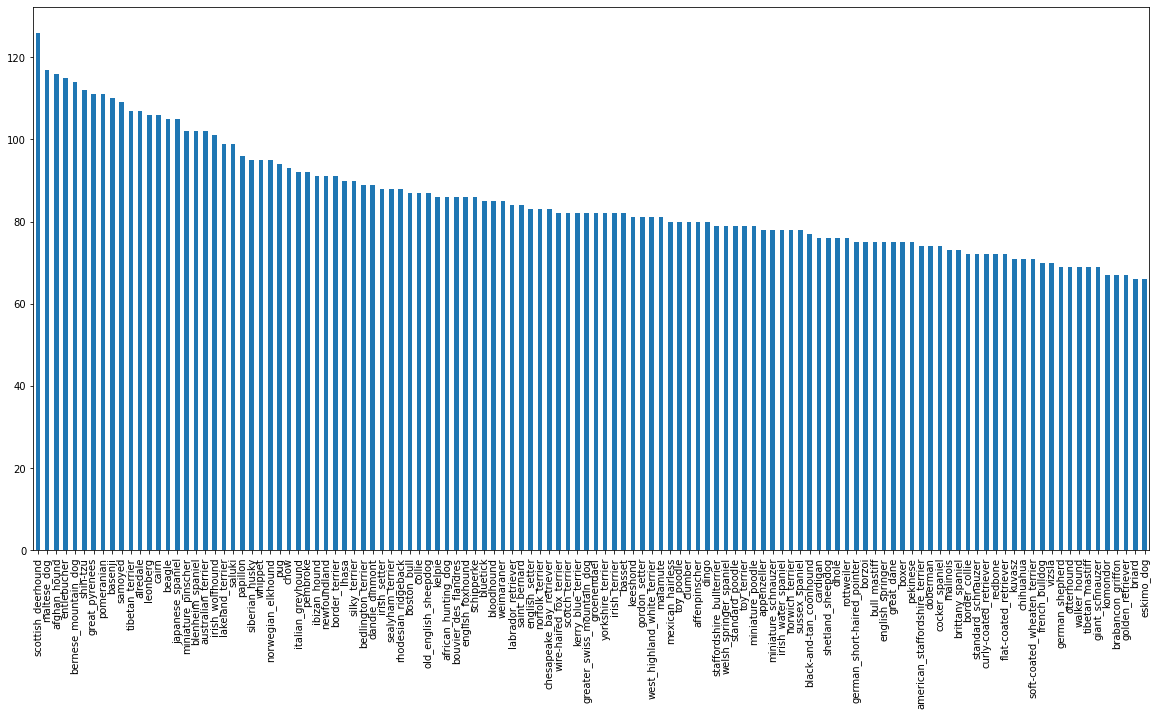

In [ ]:
labels_csv['breed'].value_counts().plot(kind="bar", figsize=(20,10));

### Memuat pathnames

In [ ]:
filenames = ['./train/' + filename + ".jpg" for filename in labels_csv.id]
filenames[:10]

['./train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 './train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 './train/001cdf01b096e06d78e9e5112d419397.jpg',
 './train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 './train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 './train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 './train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 './train/002a283a315af96eaea0e28e7163b21b.jpg',
 './train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 './train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Menyiapkan kategori anjing

In [ ]:
labels = np.array(labels_csv.breed)
labels[:len(labels)]

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
unique_labels = np.unique(labels)
len(unique_labels)

120

In [ ]:
unique_labels[0]

'affenpinscher'

In [ ]:
labels[0] == unique_labels

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_labels = [label == unique_labels for label in labels]
boolean_labels[:2], len(boolean_labels)

([array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False]),
  array([False, False, False, Fa

In [ ]:
labels[0], np.where(unique_labels == labels[0]), boolean_labels[0].astype(int)

('boston_bull',
 (array([19]),),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

## Memuat validation dataset

In [ ]:
X = filenames
y = boolean_labels

### Experimenting

In [ ]:
NUM_IMAGES = 1000 #@param {type: "slider", min: 1000, max: 10000, step: 1000}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [ ]:
X_train[:10], y_train[0]

(['./train/00bee065dcec471f26394855c5c2f3de.jpg',
  './train/0d2f9e12a2611d911d91a339074c8154.jpg',
  './train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  './train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  './train/146fbfac6b5b1f0de83a5d0c1b473377.jpg',
  './train/0ea5759640f2e1c2d1a06adaf8a54ca7.jpg',
  './train/03e1d2ee5fd90aef036c90a9e7f81177.jpg',
  './train/16941a6728ddb9cb7423a6cc97fbe071.jpg',
  './train/0bedbecd92390ef9f4f7c8b06a629340.jpg',
  './train/143b9484273e57668d03bfc26755810a.jpg'],
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
  

## Preprocessing gambar

In [ ]:
image = imread(filenames[50])
image.shape

(240, 320, 3)

In [ ]:
image = imread(filenames[40])
image.shape

(293, 400, 3)

In [ ]:
def resize_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, "float32")
  image = tf.image.resize(image, size=[224, 224])
  return image

In [ ]:
def get_image_label(image_path, label):
  image = resize_image(image_path)
  return image, label

In [ ]:
def create_data_batches(X, y=None, batch_size=32, valid_data=False, test_data=False):
  if test_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(resize_image).batch(32)
    return data_batch
  elif valid_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(32)
    return data_batch
  else:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_image_label).batch(32)
    return data_batch

In [ ]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Modelling dengan n-`jumlah_gambar`

In [ ]:
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
INPUT_SHAPE = [None, 224, 224, 3]
OUTPUT_SHAPE = len(unique_labels)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [ ]:
model = tf.keras.Sequential([                  
  hub.KerasLayer(MODEL_URL),
  tf.keras.layers.Dense(OUTPUT_SHAPE, activation="softmax")
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.fit(train_data,
          epochs=100,
          validation_data=val_data,
          validation_freq=1,
          callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, verbose=1)])

Epoch 1/100
25/25 [==============================] - 10s 194ms/step - loss: 4.6351 - accuracy: 0.0962 - val_loss: 3.3939 - val_accuracy: 0.2750
Epoch 2/100
25/25 [==============================] - 4s 143ms/step - loss: 1.6845 - accuracy: 0.6700 - val_loss: 2.1581 - val_accuracy: 0.5450
Epoch 3/100
25/25 [==============================] - 4s 145ms/step - loss: 0.5787 - accuracy: 0.9287 - val_loss: 1.6770 - val_accuracy: 0.6050
Epoch 4/100
25/25 [==============================] - 4s 147ms/step - loss: 0.2531 - accuracy: 0.9925 - val_loss: 1.5123 - val_accuracy: 0.6250
Epoch 5/100
25/25 [==============================] - 4s 148ms/step - loss: 0.1496 - accuracy: 0.9975 - val_loss: 1.4139 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 4s 146ms/step - loss: 0.1023 - accuracy: 0.9987 - val_loss: 1.3654 - val_accuracy: 0.6550
Epoch 7/100
25/25 [==============================] - 4s 147ms/step - loss: 0.0764 - accuracy: 1.0000 - val_loss: 1.3365 - val_accuracy: 0.665

## Memuat prediksi

In [ ]:
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 122ms/step


array([[1.1354534e-02, 6.2372193e-05, 6.5291475e-04, ..., 1.7768632e-04,
        3.9519564e-05, 9.3317562e-04],
       [4.1171047e-04, 3.2878041e-05, 6.0558054e-03, ..., 2.5159183e-05,
        1.4638943e-04, 8.1100488e-06],
       [8.8787556e-07, 7.5575863e-06, 1.5071006e-05, ..., 1.3664690e-05,
        2.8023045e-05, 1.3209376e-04],
       ...,
       [5.5842702e-07, 3.7749821e-06, 6.0745820e-06, ..., 7.1799587e-07,
        4.6577858e-05, 7.7112218e-06],
       [3.7359446e-03, 3.6938676e-05, 1.0774039e-05, ..., 1.8850638e-05,
        3.9314018e-06, 4.1518002e-03],
       [1.3307737e-04, 1.4058419e-05, 2.3818787e-03, ..., 2.1697730e-03,
        4.5081988e-04, 3.8191432e-05]], dtype=float32)

In [ ]:
len(predictions)

200

In [ ]:
predictions[0]

array([1.1354534e-02, 6.2372193e-05, 6.5291475e-04, 2.1054981e-05,
       4.6127435e-04, 6.1663259e-06, 4.2797648e-03, 8.9432264e-04,
       1.6347438e-05, 7.3163028e-05, 9.1798858e-05, 4.7447094e-05,
       9.4214134e-05, 1.6129510e-04, 1.2672870e-04, 8.7986402e-05,
       1.8732993e-05, 1.2809139e-01, 2.5670248e-05, 8.8961177e-05,
       9.2802322e-05, 5.2999341e-05, 3.4399941e-06, 7.1889219e-05,
       2.8500703e-05, 4.8631591e-05, 1.4243934e-01, 1.2591258e-05,
       1.2187705e-04, 1.6639255e-04, 1.2660928e-05, 1.9553625e-03,
       9.3306837e-05, 2.1179126e-06, 1.4357648e-05, 3.8289599e-02,
       1.1617412e-05, 1.6901552e-04, 4.9870494e-05, 8.1142534e-06,
       4.9253326e-04, 8.3841034e-05, 1.6691527e-05, 2.1770551e-04,
       6.3315720e-06, 2.4329496e-05, 1.2444127e-05, 1.5825588e-04,
       4.0842799e-04, 1.9941093e-04, 1.1072180e-04, 5.7238369e-04,
       1.3330637e-04, 2.6944501e-05, 2.4373247e-05, 4.0787469e-05,
       3.6044243e-05, 2.4940788e-03, 3.5403710e-04, 3.5267356e

### Visualisasi lagi...

In [ ]:
images_ = []
labels_ = []

for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0], labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
def get_pred_label(pred_probs):
  return unique_labels[tf.argmax(pred_probs)]

In [ ]:
def unbatchify(data):
  images = []
  labels =[]

  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_labels[np.argmax(label)])
  
  return images, labels

val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(predictions[100])

'bloodhound'

In [ ]:
get_pred_label(labels_[100])

'bloodhound'

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  pred_label = get_pred_label(pred_prob)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  plt.title("{} {:2.0f}% {}".format(pred_label, np.max(pred_prob)*100, true_label), color=color)

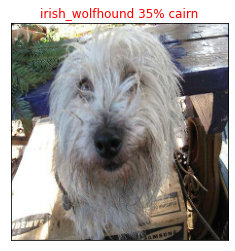

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=0)

## Visualizing data batches

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  pred_label = get_pred_label(pred_prob)
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = unique_labels[top_10_pred_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), top_10_pred_values, color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)), labels=top_10_pred_labels, rotation="vertical")

  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels) == true_label].set_color("green")
  else:
    pass

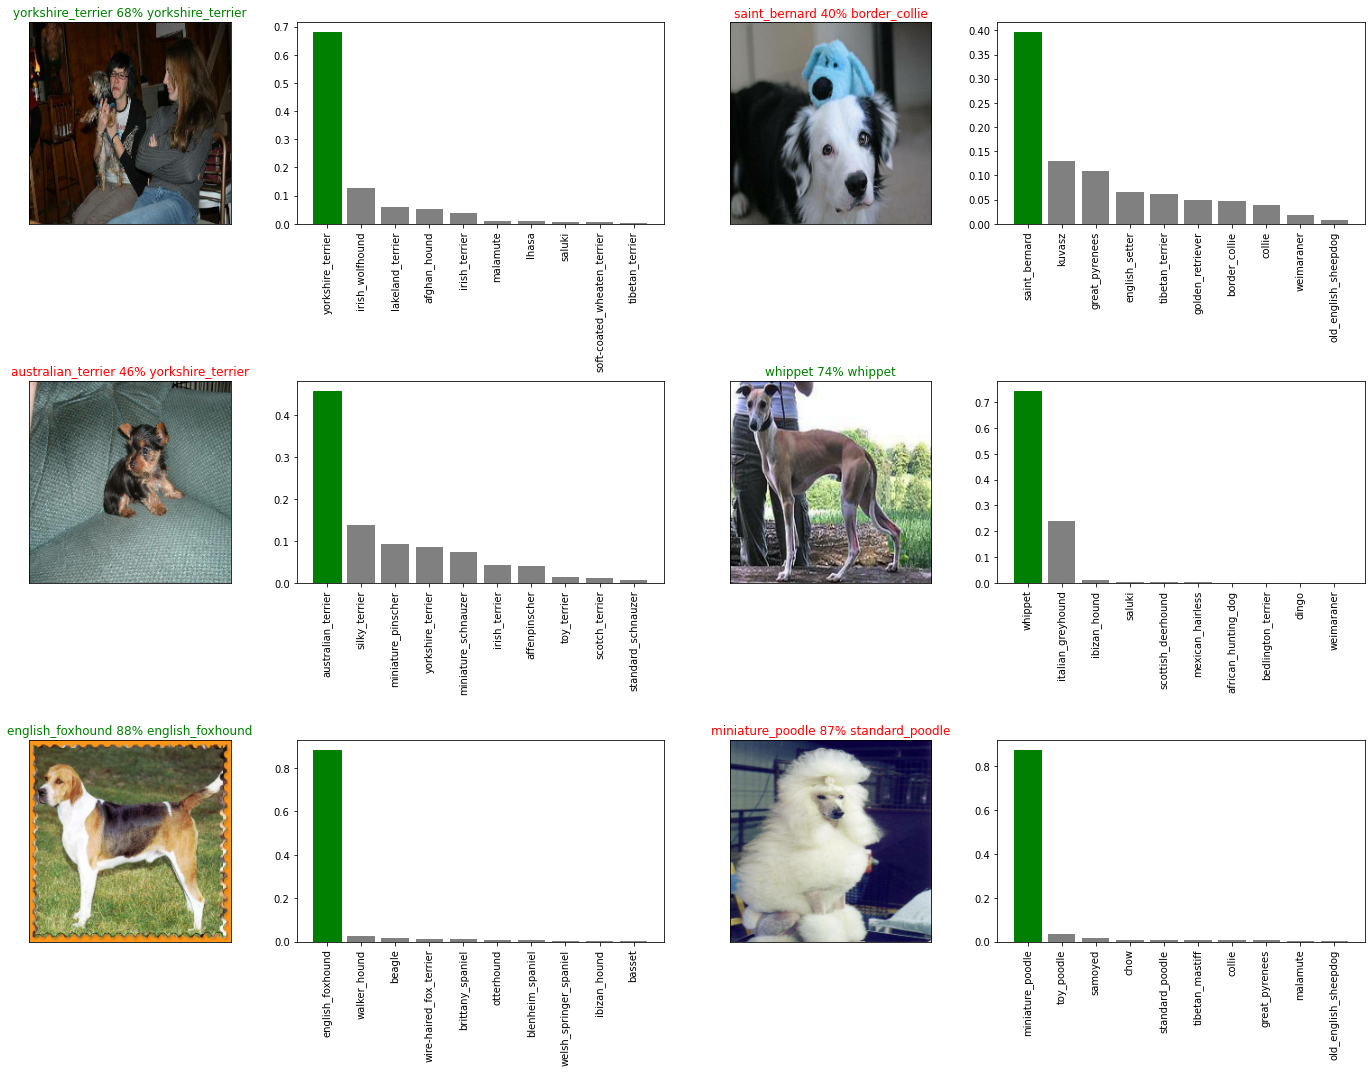

In [ ]:
i_mul = 10
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows,2*num_cols, 2*i+1)
  plot_pred(predictions, val_labels, val_images, i+i_mul)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(predictions, val_labels, n=i+i_mul)
  plt.tight_layout(h_pad=1.0)

plt.show()

## Full dataset training

In [ ]:
full_data = create_data_batches(X, y)
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
model = tf.keras.Sequential([                  
  hub.KerasLayer(MODEL_URL),
  tf.keras.layers.Dense(OUTPUT_SHAPE, activation="softmax")
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.fit(x=full_data,
              epochs=100,
              callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor="loss")])

Epoch 1/100
320/320 [==============================] - 44s 123ms/step - loss: 1.3256 - accuracy: 0.6754
Epoch 2/100
320/320 [==============================] - 38s 119ms/step - loss: 0.4029 - accuracy: 0.8829
Epoch 3/100
320/320 [==============================] - 39s 121ms/step - loss: 0.2382 - accuracy: 0.9365
Epoch 4/100
320/320 [==============================] - 41s 126ms/step - loss: 0.1554 - accuracy: 0.9620
Epoch 5/100
320/320 [==============================] - 41s 129ms/step - loss: 0.1074 - accuracy: 0.9778
Epoch 6/100
320/320 [==============================] - 41s 128ms/step - loss: 0.0786 - accuracy: 0.9864
Epoch 7/100
320/320 [==============================] - 41s 128ms/step - loss: 0.0576 - accuracy: 0.9923
Epoch 8/100
320/320 [==============================] - 41s 128ms/step - loss: 0.0464 - accuracy: 0.9944
Epoch 9/100
320/320 [==============================] - 42s 130ms/step - loss: 0.0375 - accuracy: 0.9961
Epoch 10/100
320/320 [==============================] - 39s 121m

### Save dan load model

In [ ]:
model.save("big_dog_model.h5")

In [ ]:
model = tf.keras.models.load_model("big_dog_model.h5", custom_objects={"KerasLayer": hub.KerasLayer})

## Melakukan prediksi dari gambar kustom

In [ ]:
custom_path = "drive/MyDrive/Colab Notebooks/dog/"
custom_images_paths = [custom_path + fname for fname in os.listdir(custom_path)]
custom_images_paths

['drive/MyDrive/Colab Notebooks/dog/maltese.jpeg',
 'drive/MyDrive/Colab Notebooks/dog/golde.jpeg',
 'drive/MyDrive/Colab Notebooks/dog/custom.jpg',
 'drive/MyDrive/Colab Notebooks/dog/custom2.jpg',
 'drive/MyDrive/Colab Notebooks/dog/random.jpeg',
 'drive/MyDrive/Colab Notebooks/dog/random2.jpeg',
 'drive/MyDrive/Colab Notebooks/dog/random1.jpeg']

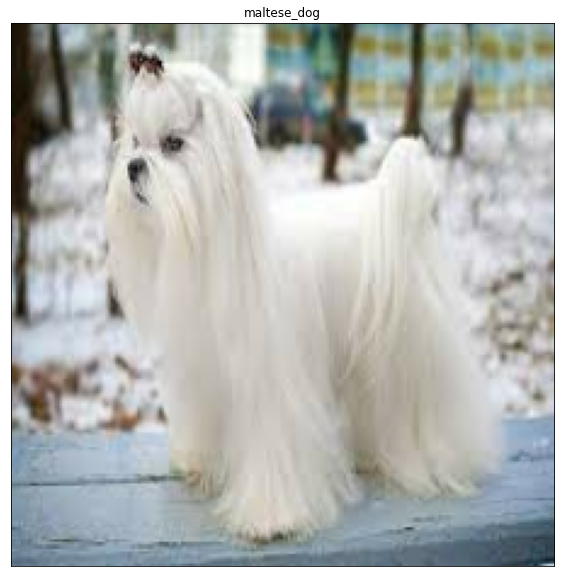

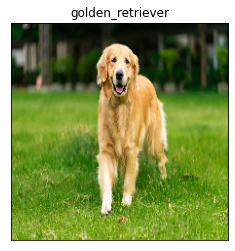

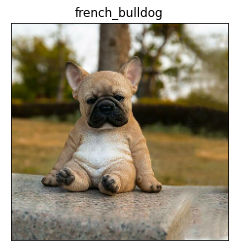

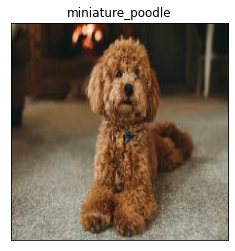

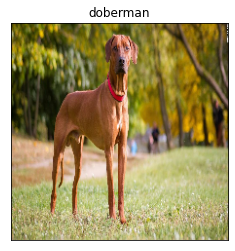

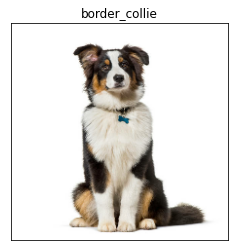

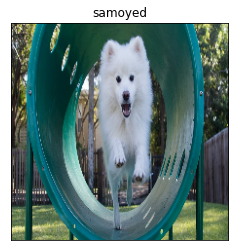

In [ ]:
custom_data = create_data_batches(custom_images_paths, test_data=True)
custom_preds = model.predict(custom_data)
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]

custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot()
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)
  plt.show()